# Health metrics, lifestyle and social factors tendencies among patients with colorectal cancer

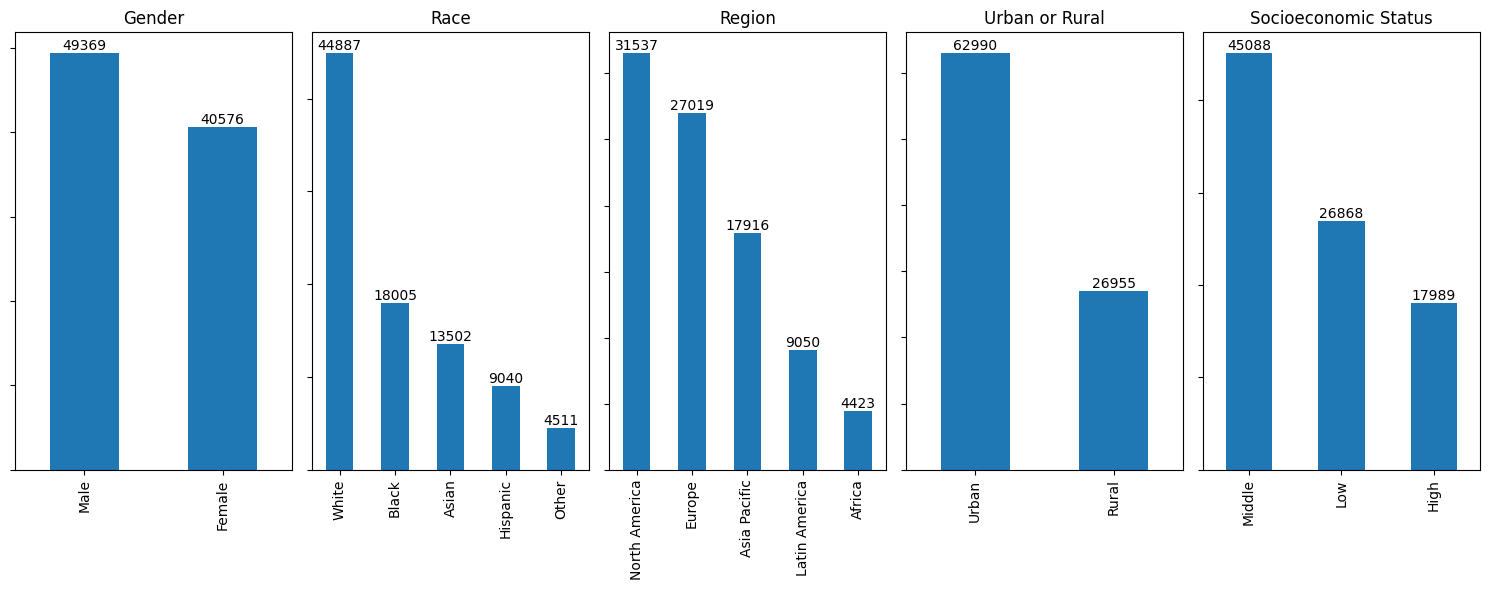

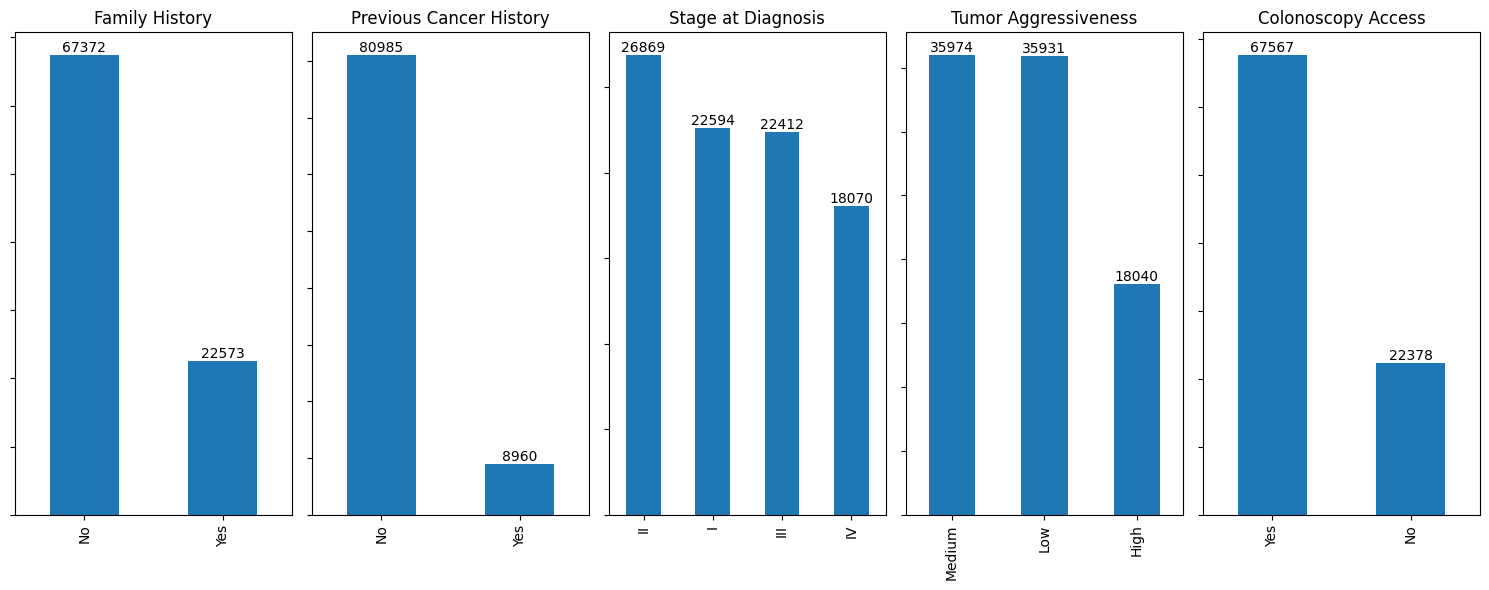

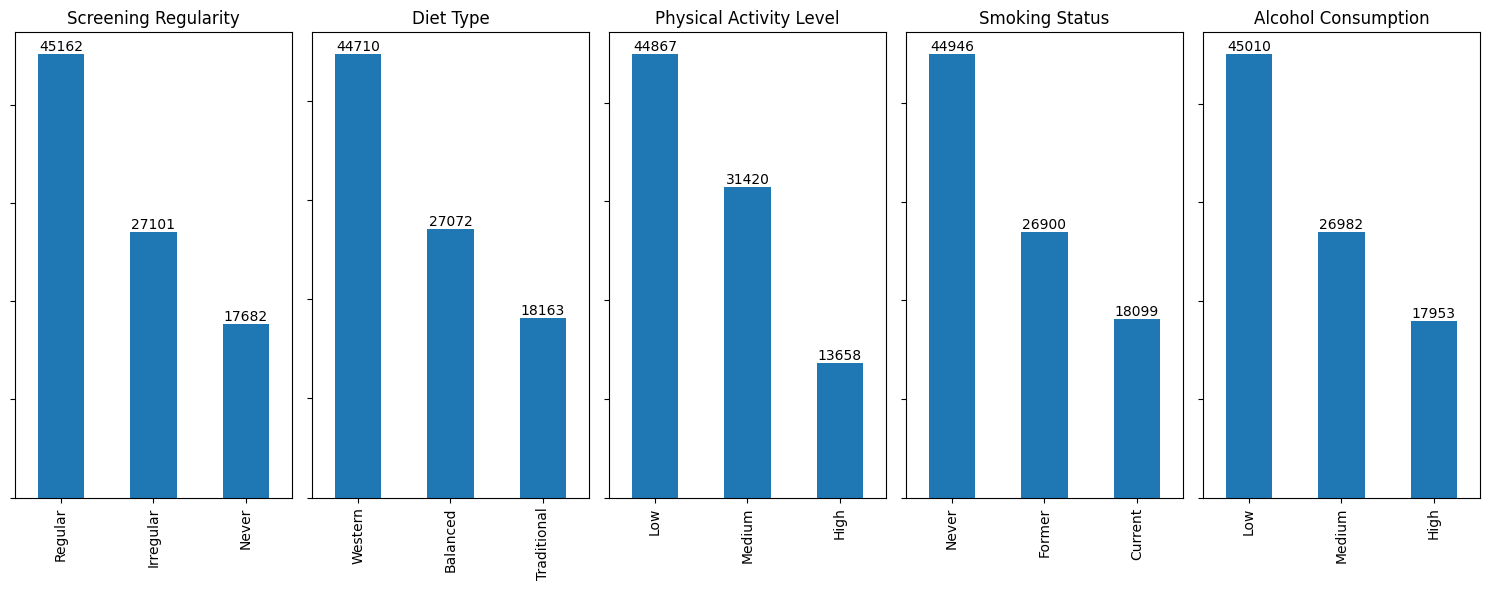

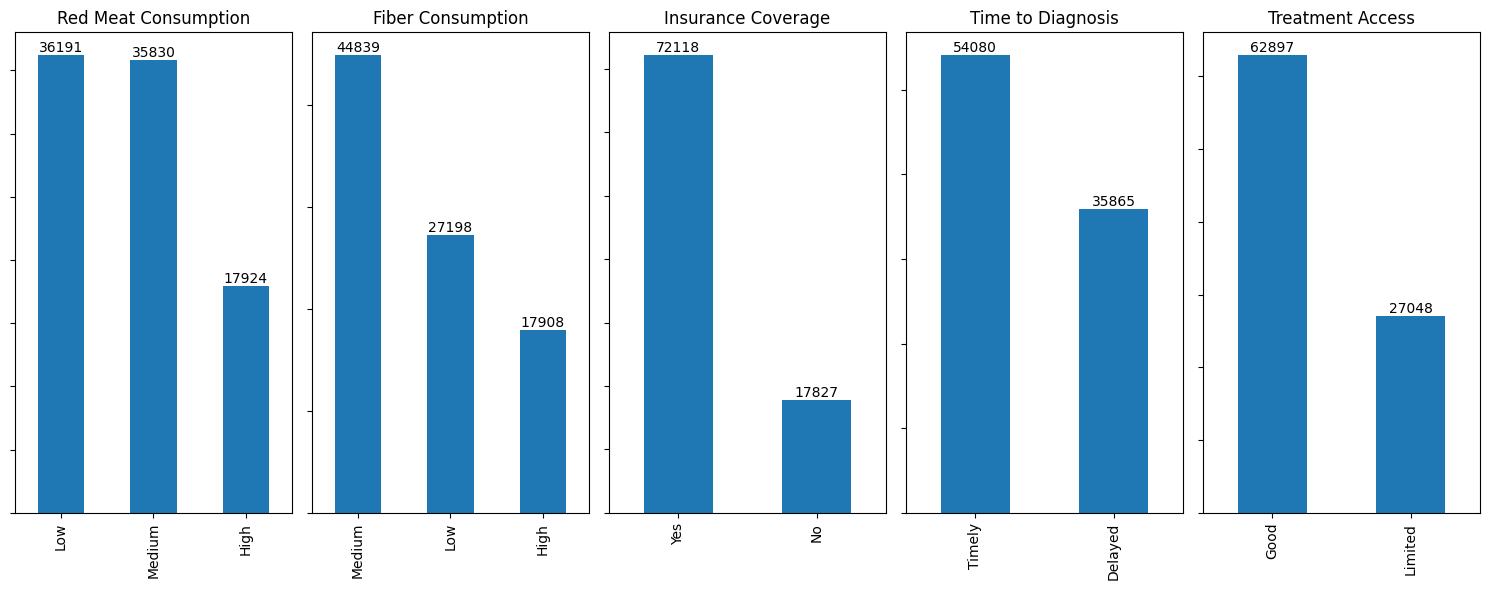

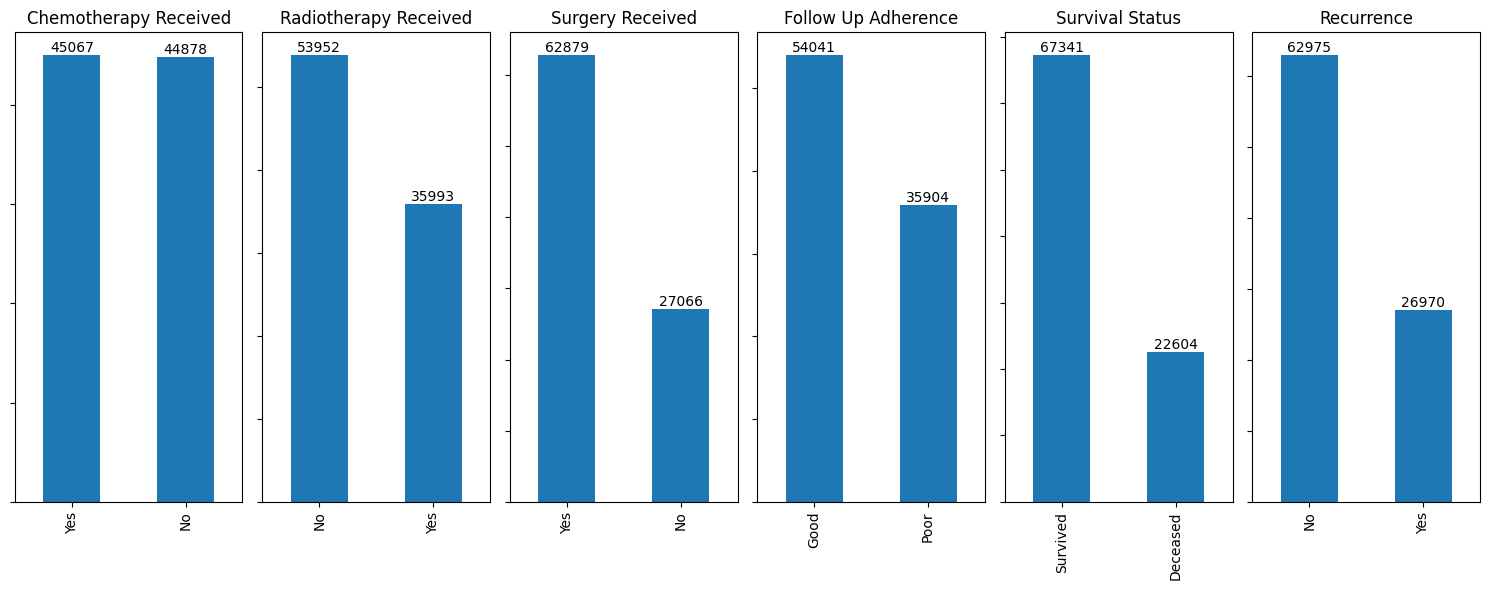

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

df = pd.read_csv("./dataset/colorectal_cancer_prediction.csv")

df.drop("Patient_ID", axis=1, inplace=True)

cats = [i for i in df.columns if df[i].nunique() <= 5]
nums = [i for i in df.columns if i not in cats]

index = 0

for j in [5, 5, 5, 5, 6]:
    fig, axes = plt.subplots(ncols=j, figsize=(15, 6))
    for i in range(j):
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        bar_labels(axes[i])
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

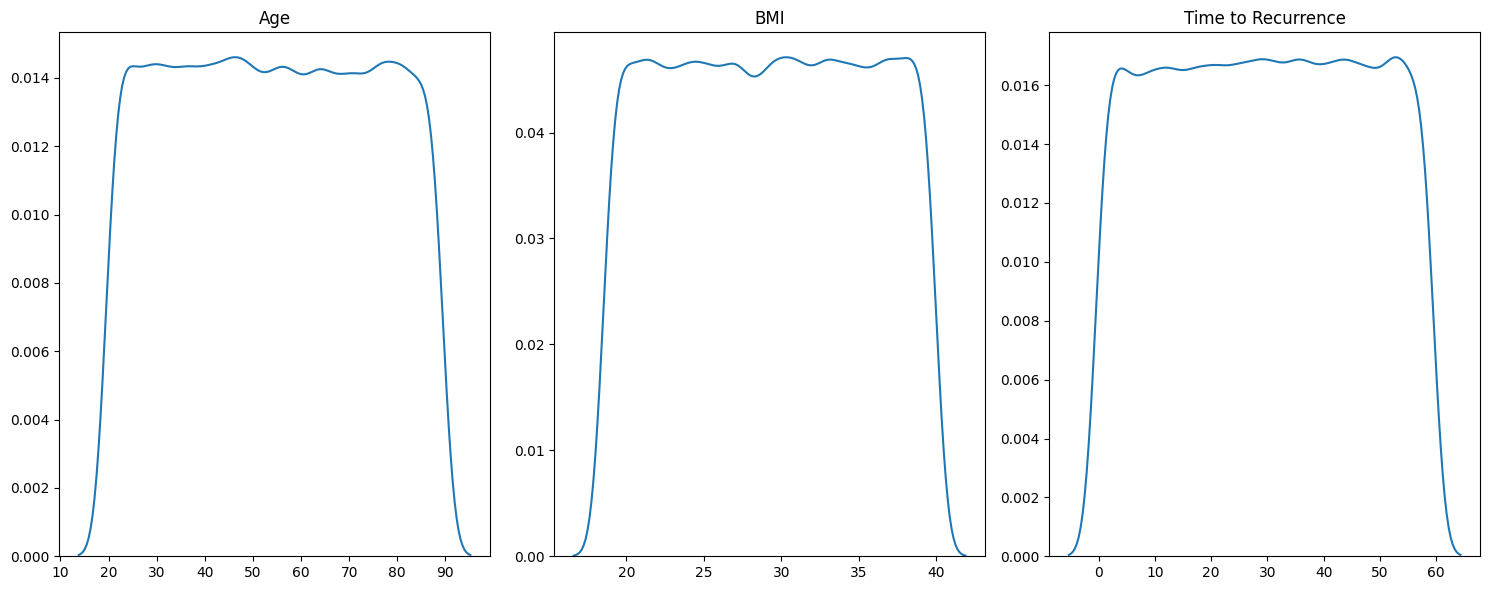

In [2]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.kdeplot(df, x=j, ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# Which patients survived

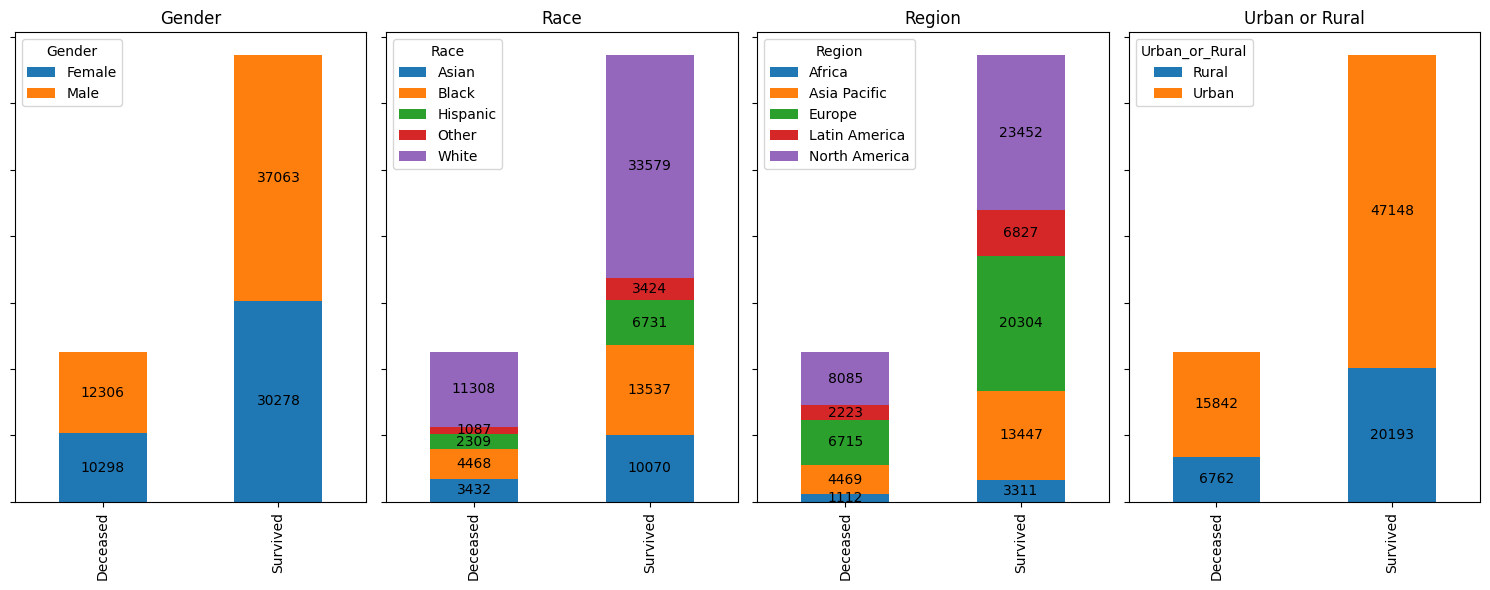

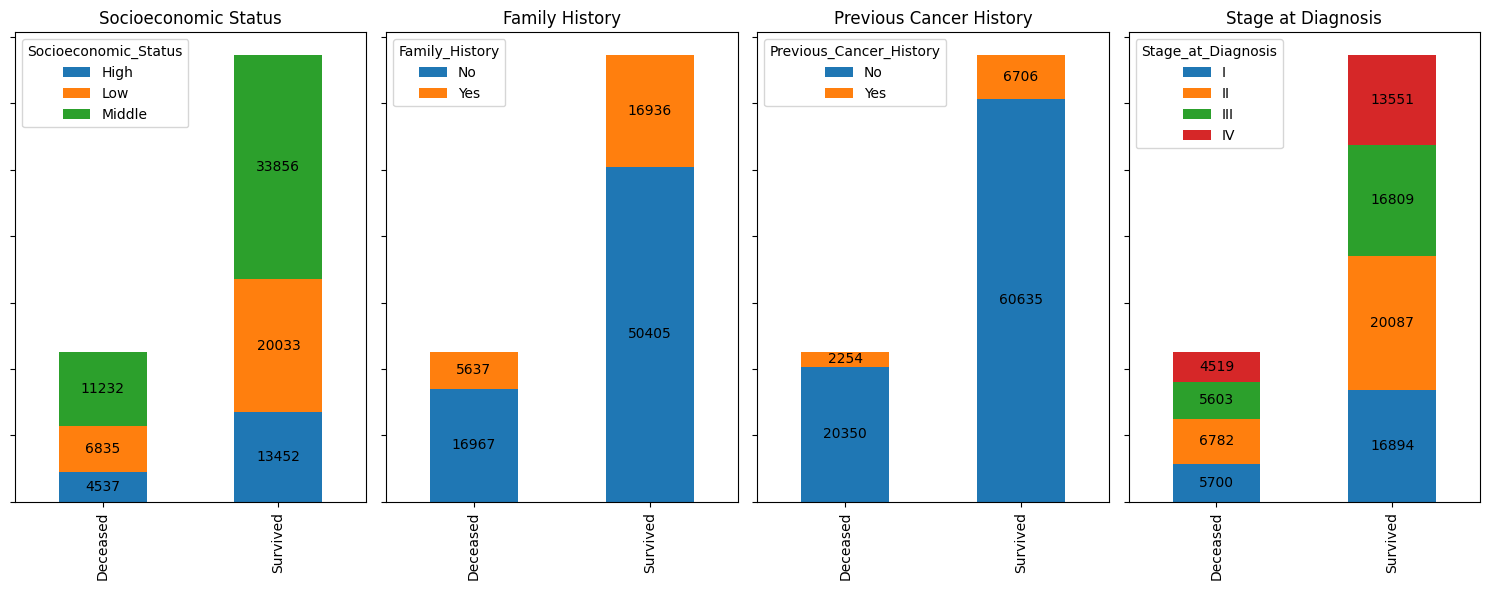

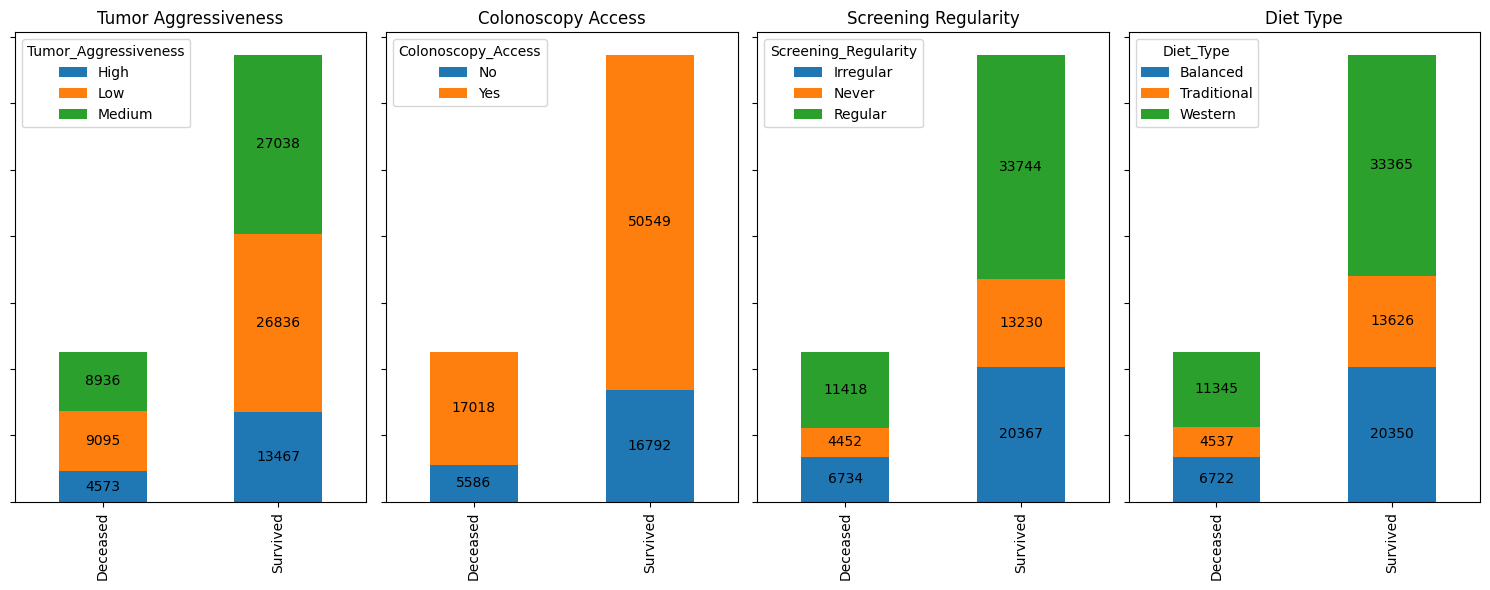

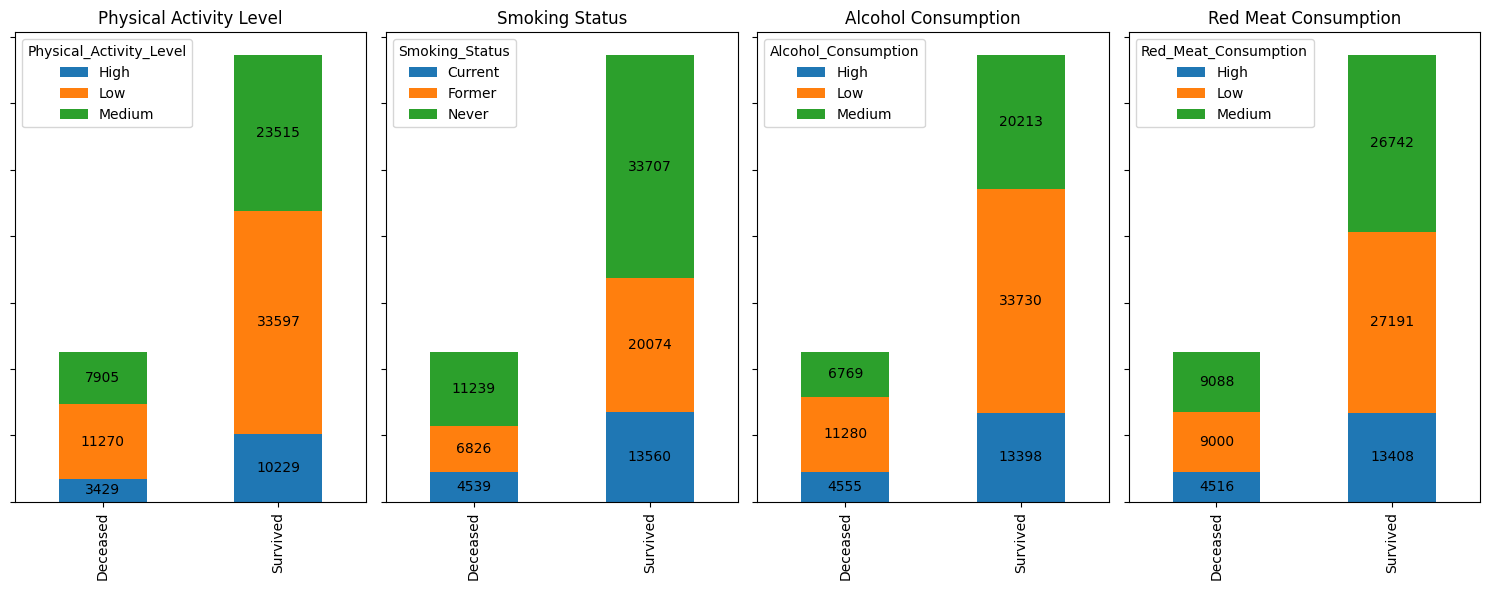

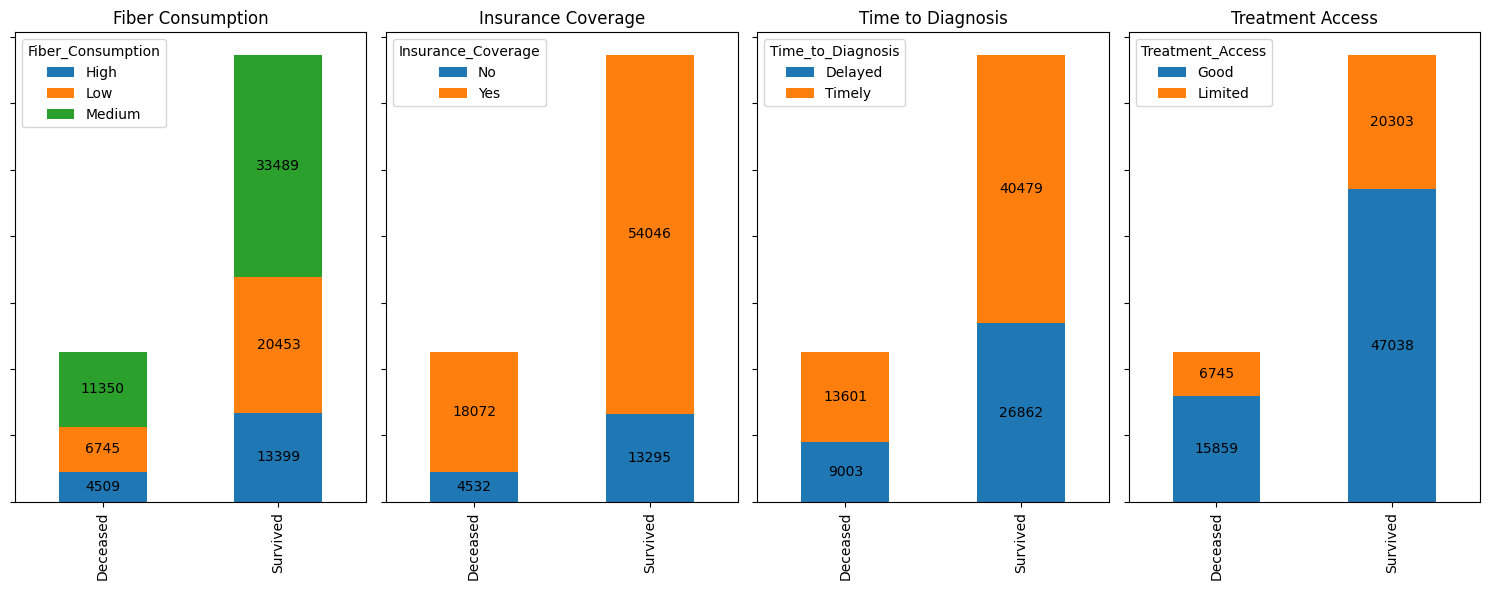

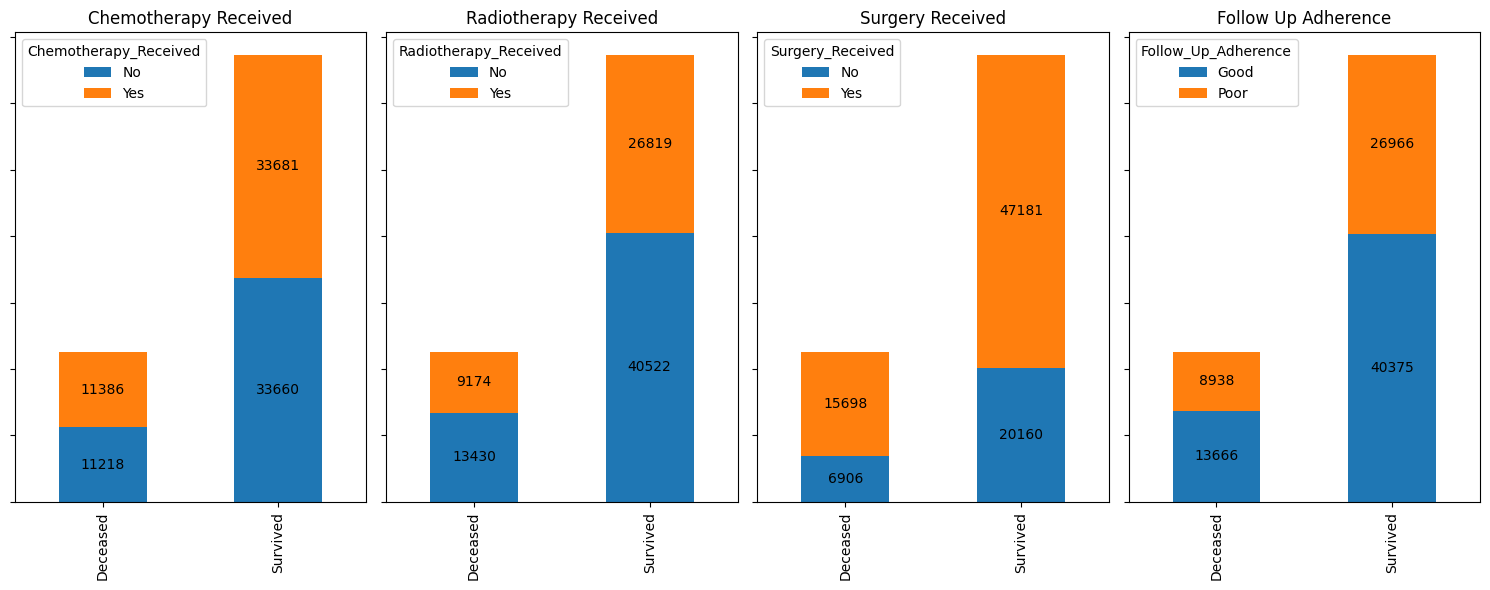

In [3]:
grouped = df.groupby(cats[-2])

index = 0

for _ in range(6):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        grouped[cats[index]].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
        bar_labels(axes[i], 0, "center")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Recurrence among survived patients

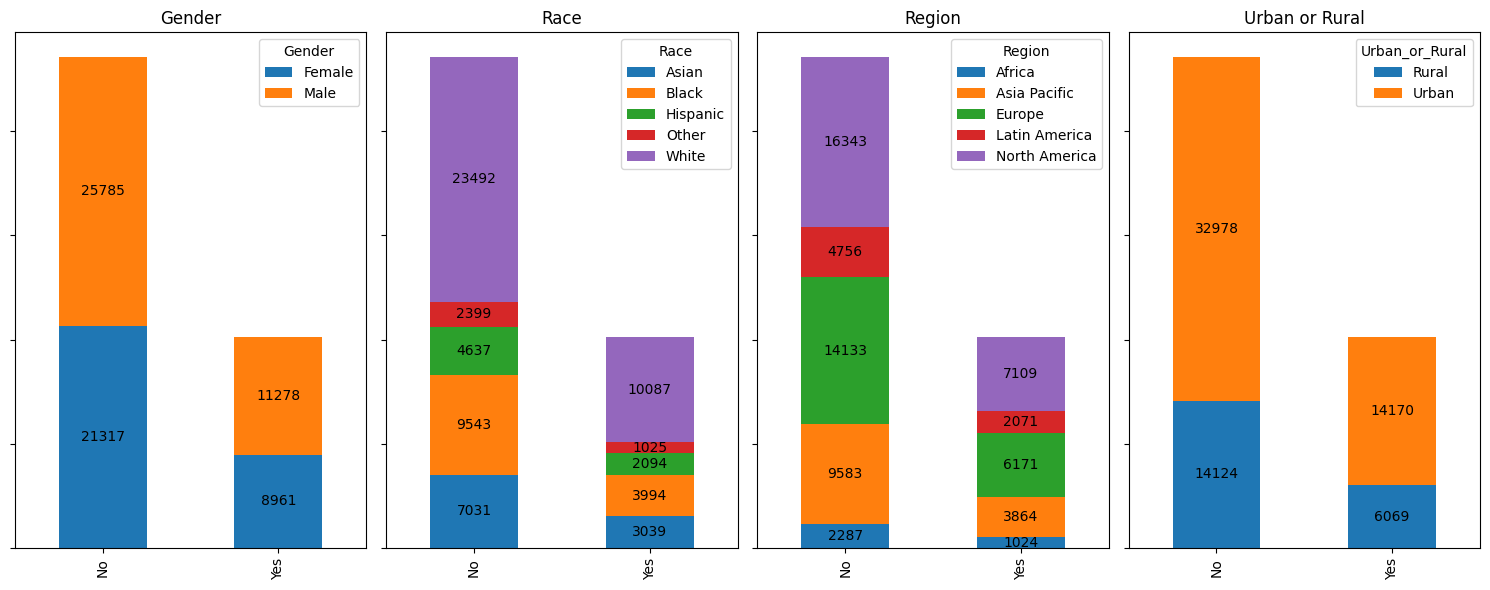

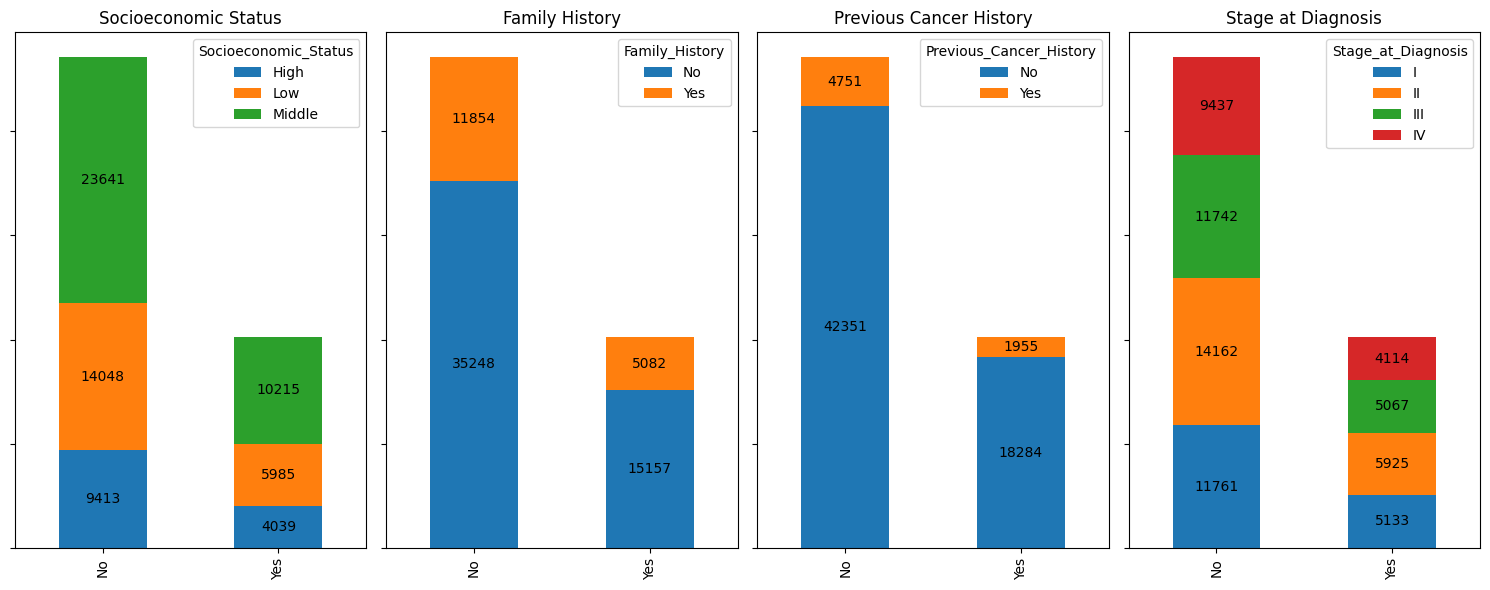

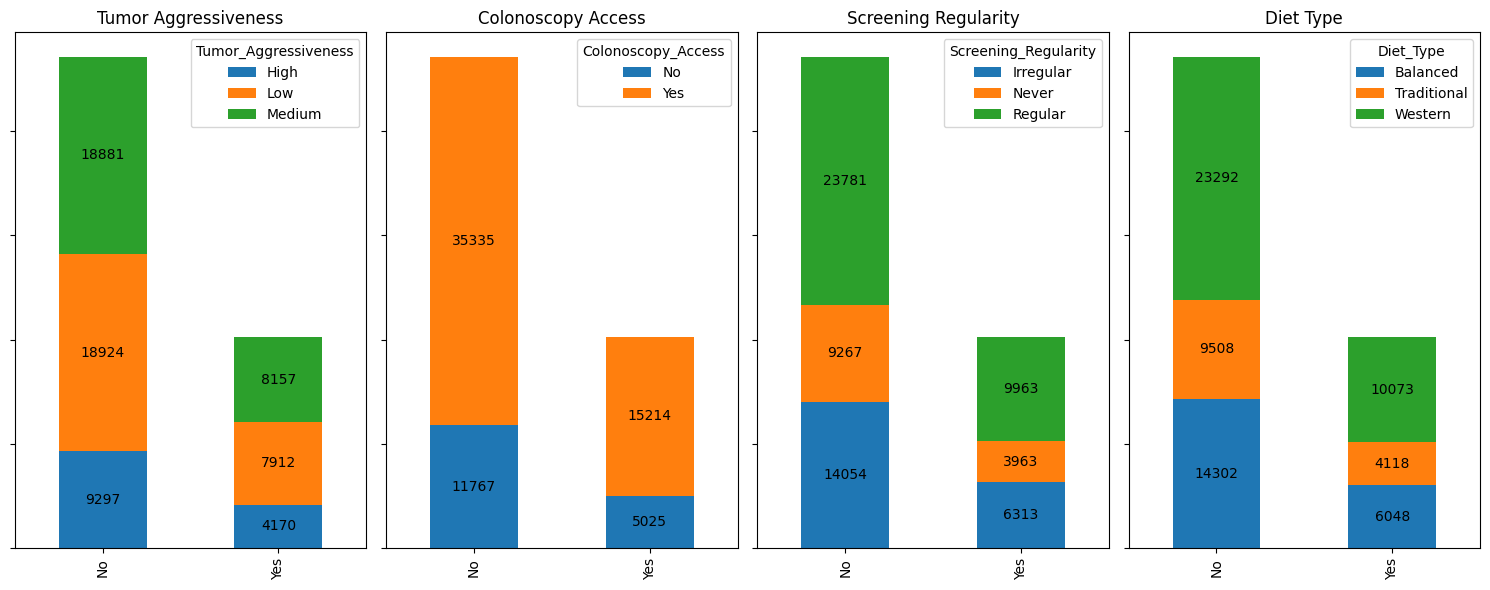

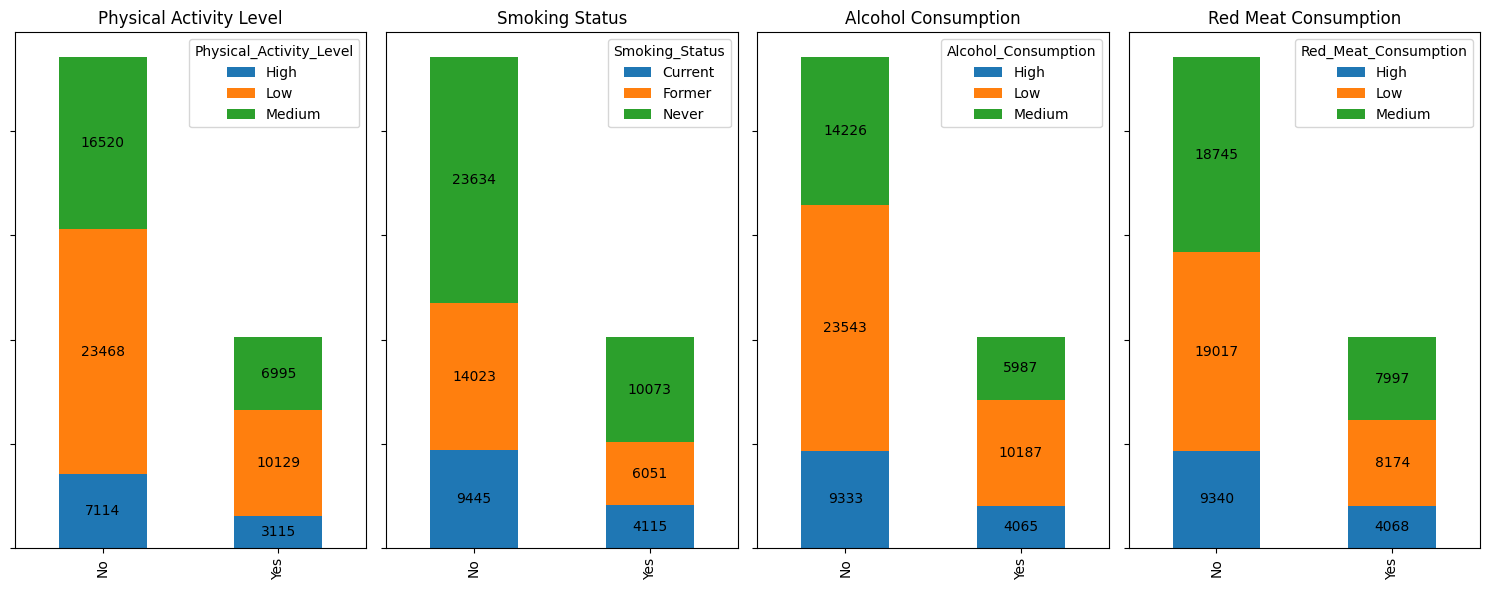

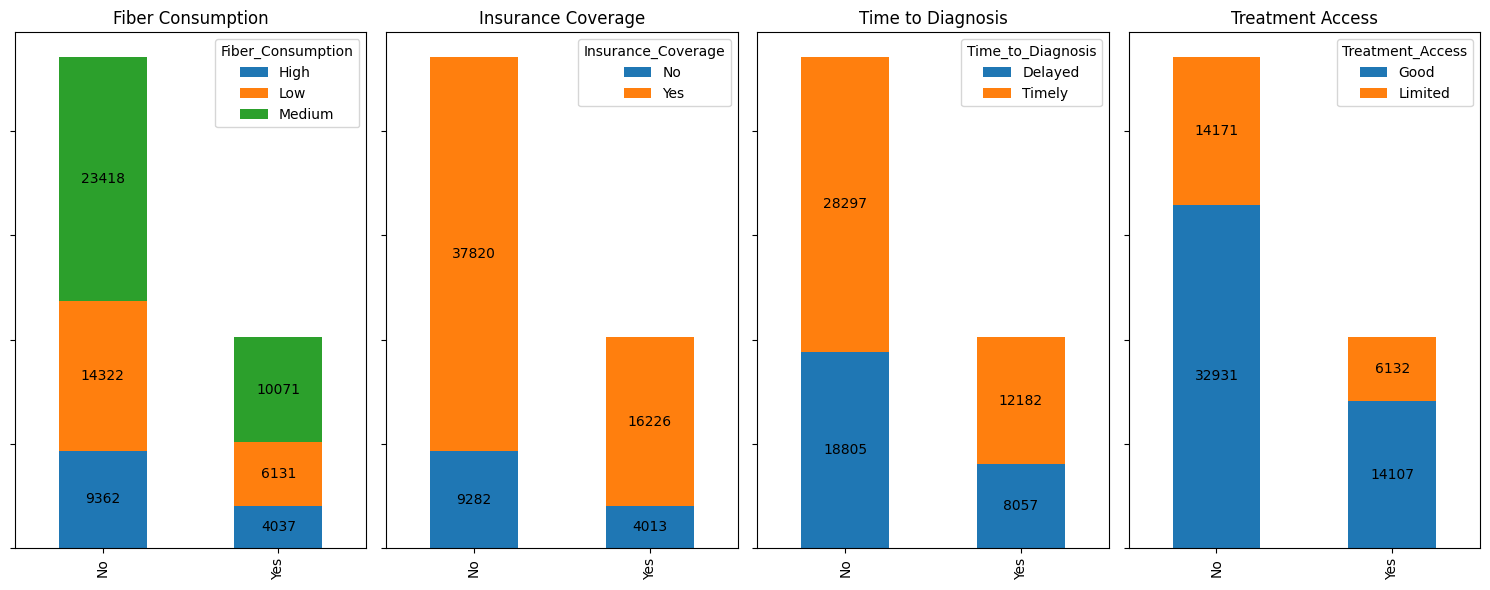

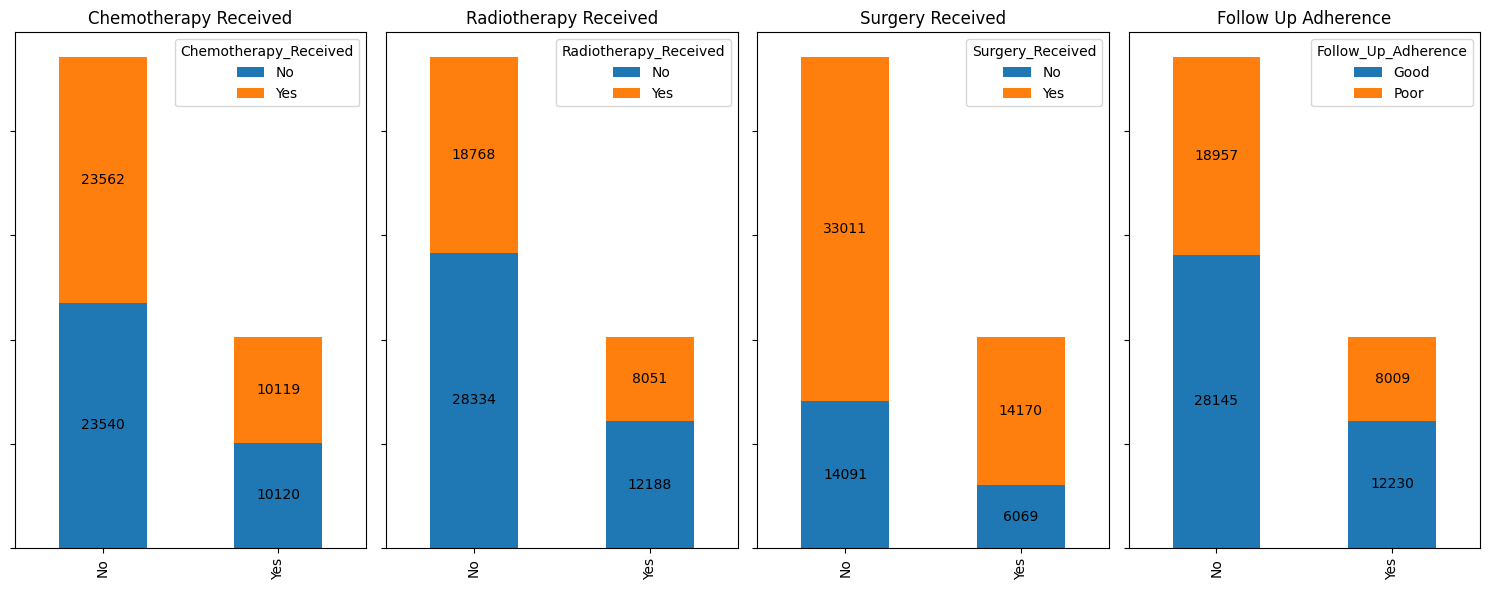

In [4]:
temp_df = df[df[cats[-2]] == "Survived"]

index = 0

grouped = temp_df.groupby(cats[-1])

for _ in range(6):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        grouped[cats[index]].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
        bar_labels(axes[i], 0, "center")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Cancer survival and recurrence likelihood for numerical factors

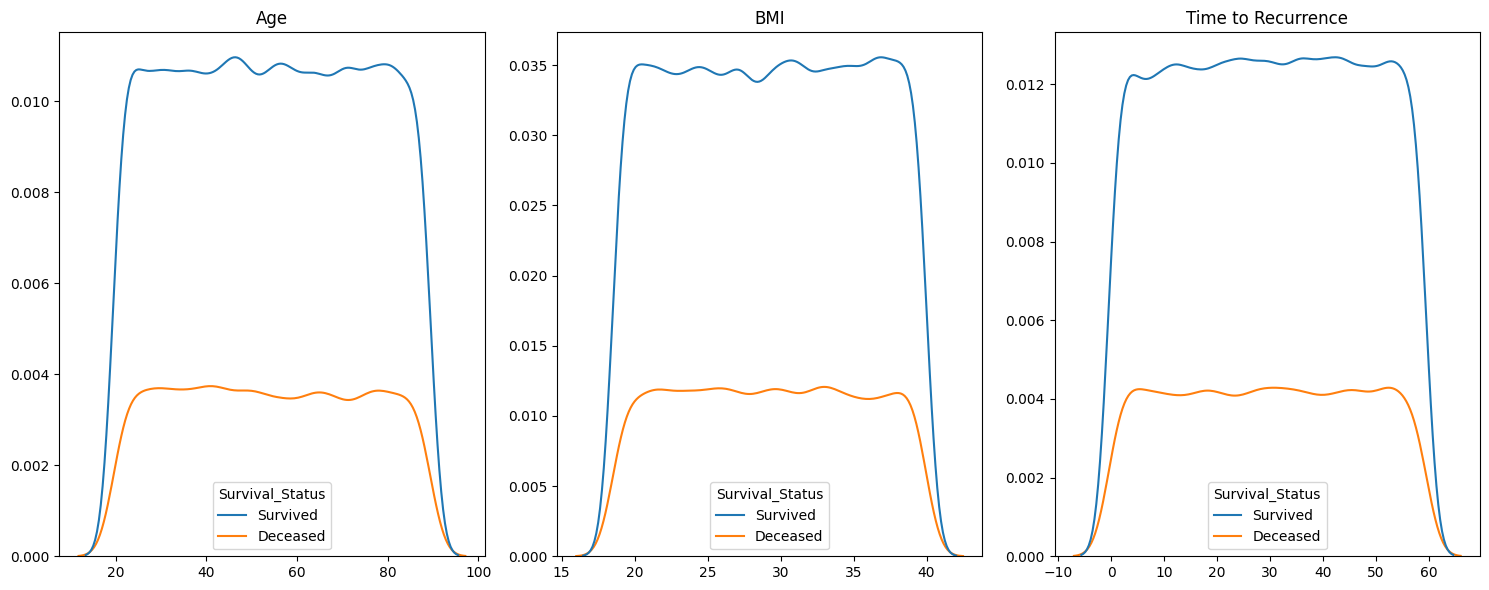

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.kdeplot(df, x=j, hue=cats[-2], ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

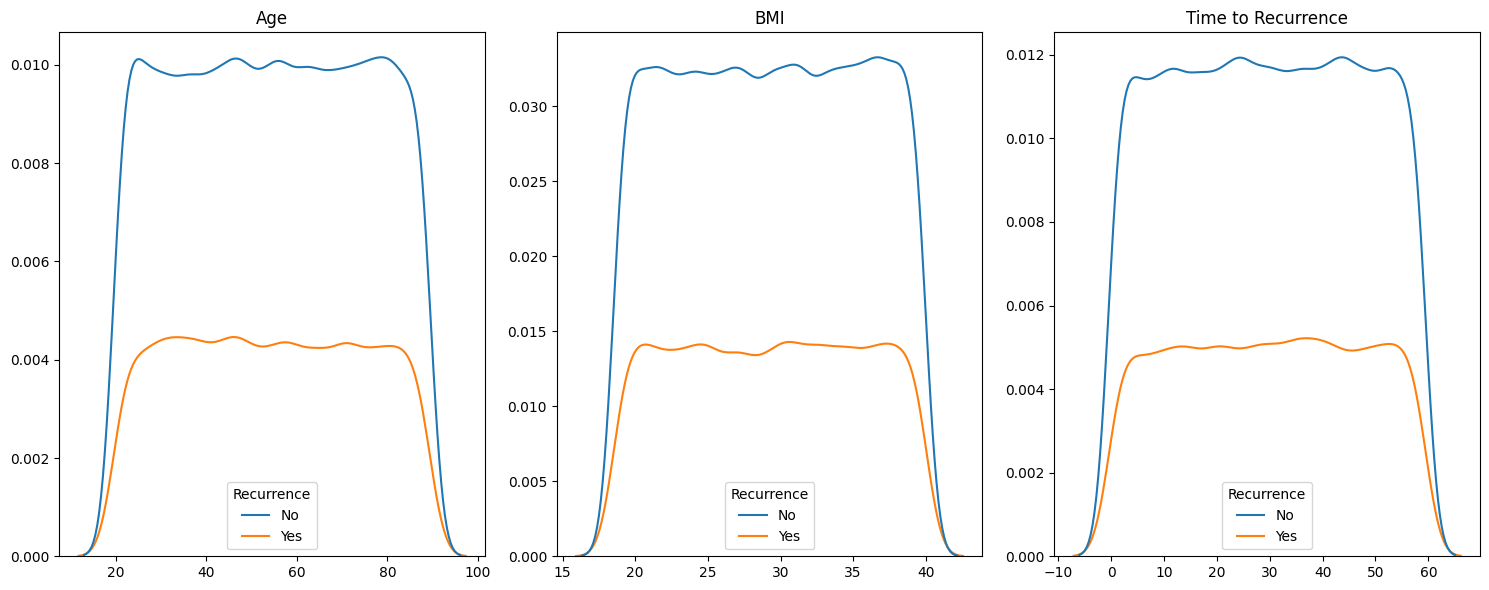

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.kdeplot(temp_df, x=j, hue=cats[-1], ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# XGBoost classification algorithms for survival and recurrence likelihood

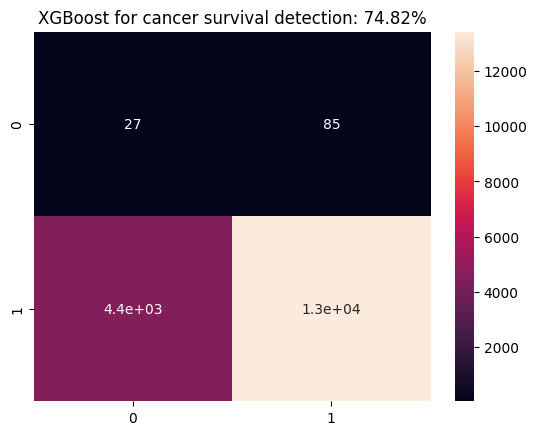

              precision    recall  f1-score   support

           0       0.01      0.24      0.01       112
           1       0.99      0.75      0.86     17877

    accuracy                           0.75     17989
   macro avg       0.50      0.50      0.43     17989
weighted avg       0.99      0.75      0.85     17989



In [7]:
for i in cats:
    df[i] = LabelEncoder().fit_transform(df[i].values)

x = df.iloc[:, :-3].values
y = df.iloc[:, -3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train, y_train = SMOTE().fit_resample(x_train, y_train)

model = XGBClassifier()
model.fit(x_train, y_train)

pred = model.predict(x_test)
score = accuracy_score(pred, y_test)
sns.heatmap(confusion_matrix(pred, y_test), annot=True)
plt.title("XGBoost for cancer survival detection: {}%".format(round(score*100, 2)))
plt.show()
print(classification_report(pred, y_test))

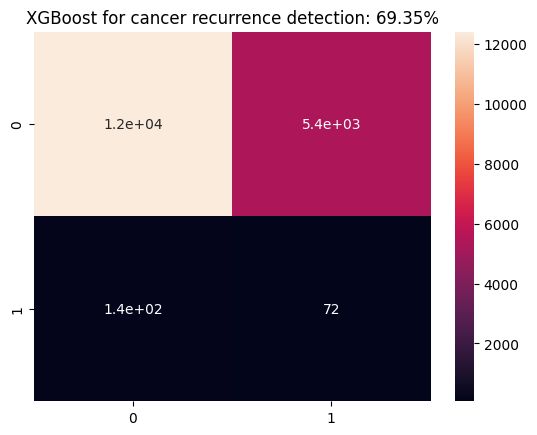

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     17774
           1       0.01      0.33      0.03       215

    accuracy                           0.69     17989
   macro avg       0.50      0.52      0.42     17989
weighted avg       0.98      0.69      0.81     17989



In [8]:
x = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train, y_train = SMOTE().fit_resample(x_train, y_train)

model = XGBClassifier()
model.fit(x_train, y_train)

pred = model.predict(x_test)
score = accuracy_score(pred, y_test)
sns.heatmap(confusion_matrix(pred, y_test), annot=True)
plt.title("XGBoost for cancer recurrence detection: {}%".format(round(score*100, 2)))
plt.show()
print(classification_report(pred, y_test))